Таблиця кінцевих різниць:
[[10.517 -0.324 -0.062  0.028  0.016 -0.    -0.001  0.002 -0.003  0.003
   0.    -0.009]
 [10.193 -0.386 -0.034  0.044  0.016 -0.001  0.001 -0.001 -0.     0.003
  -0.009  0.   ]
 [ 9.807 -0.42   0.01   0.06   0.015  0.     0.    -0.001  0.003 -0.006
   0.     0.   ]
 [ 9.387 -0.41   0.07   0.075  0.015  0.    -0.001  0.002 -0.003  0.
   0.     0.   ]
 [ 8.977 -0.34   0.145  0.09   0.015 -0.001  0.001 -0.001  0.     0.
   0.     0.   ]
 [ 8.637 -0.195  0.235  0.105  0.014  0.    -0.     0.     0.     0.
   0.     0.   ]
 [ 8.442  0.04   0.34   0.119  0.014  0.     0.     0.     0.     0.
   0.     0.   ]
 [ 8.482  0.38   0.459  0.133  0.014  0.     0.     0.     0.     0.
   0.     0.   ]
 [ 8.862  0.839  0.592  0.147  0.     0.     0.     0.     0.     0.
   0.     0.   ]
 [ 9.701  1.431  0.739  0.     0.     0.     0.     0.     0.     0.
   0.     0.   ]
 [11.132  2.17   0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.   ]
 [13.302  0.     0.

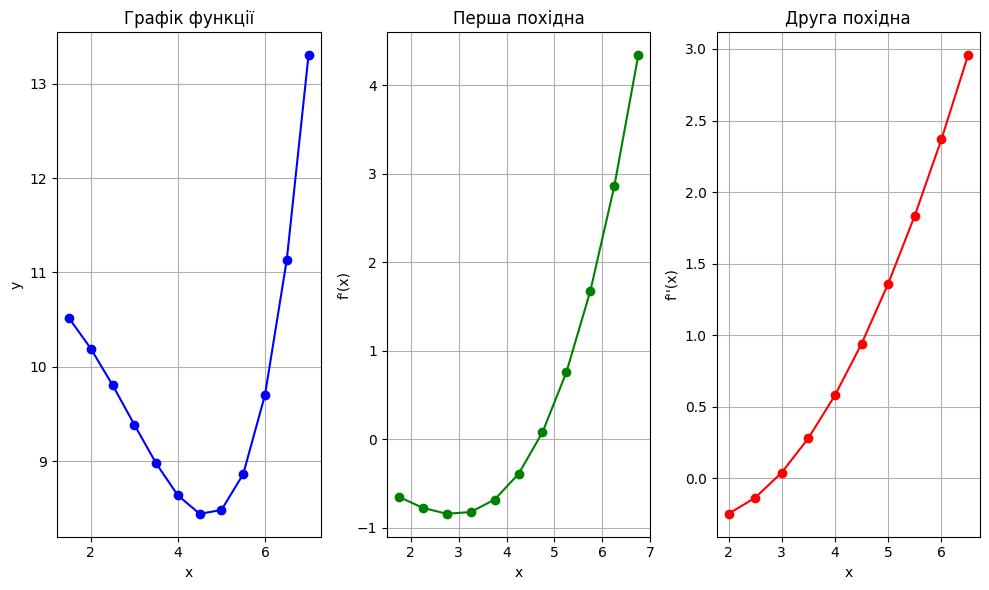

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Таблиця значень для варіанту 2 (x = 1.5)
x_values = np.array([1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0])
y_values = np.array([10.517, 10.193, 9.807, 9.387, 8.977, 8.637, 8.442, 8.482, 8.862, 9.701, 11.132, 13.302])

# Крок таблиці
h = x_values[1] - x_values[0]

# Функція для обчислення кінцевих різниць
def finite_differences(y):
    n = len(y)
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            delta_y[i, j] = delta_y[i + 1, j - 1] - delta_y[i, j - 1]

    return delta_y

# Отримуємо таблицю кінцевих різниць
delta_table = finite_differences(y_values)

# Виведемо таблицю кінцевих різниць для наочності
print("Таблиця кінцевих різниць:")
np.set_printoptions(precision=4, suppress=True)
print(delta_table)

# Значення кінцевих різниць для першої та другої похідних
delta_y1 = delta_table[0, 1]  # Δy1
delta2_y1 = delta_table[0, 2]  # Δ²y1
delta3_y1 = delta_table[0, 3]  # Δ³y1
delta4_y1 = delta_table[0, 4]  # Δ⁴y1

# Функція для обчислення першої похідної за формулою Ньютона
def first_derivative(delta_y1, delta2_y1, delta3_y1, delta4_y1, h):
    return (delta_y1 - delta2_y1 / 2 + delta3_y1 / 3 - delta4_y1 / 4) / h

# Функція для обчислення другої похідної за формулою Ньютона
def second_derivative(delta2_y1, delta3_y1, delta4_y1, h):
    return (delta2_y1 - delta3_y1 + 11 * delta4_y1 / 12) / h**2

# Обчислюємо першу та другу похідні в точці x = 1.5
y1_prime = first_derivative(delta_y1, delta2_y1, delta3_y1, delta4_y1, h)
y1_double_prime = second_derivative(delta2_y1, delta3_y1, delta4_y1, h)

y1_prime = round(y1_prime, 3)
y1_double_prime = round(y1_double_prime, 3)

# Виведемо результати
print(f"\nПерша похідна y'(1.5) ≈ {y1_prime}")
print(f"Друга похідна y''(1.5) ≈ {y1_double_prime}")

# Побудова графіків
plt.figure(figsize=(10, 6))

# Графік вихідної функції
plt.subplot(1, 3, 1)
plt.plot(x_values, y_values, label="f(x)", color='blue', marker='o')
plt.title("Графік функції")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

# Графік першої похідної
plt.subplot(1, 3, 2)
first_deriv = np.diff(y_values) / h
x_first_deriv = (x_values[:-1] + x_values[1:]) / 2  # точки між x для похідної
plt.plot(x_first_deriv, first_deriv, label="f'(x)", color='green', marker='o')
plt.title("Перша похідна")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.grid(True)

# Графік другої похідної
plt.subplot(1, 3, 3)
second_deriv = np.diff(first_deriv) / h
x_second_deriv = (x_first_deriv[:-1] + x_first_deriv[1:]) / 2  # точки для другої похідної
plt.plot(x_second_deriv, second_deriv, label="f''(x)", color='red', marker='o')
plt.title("Друга похідна")
plt.xlabel("x")
plt.ylabel("f''(x)")
plt.grid(True)

plt.tight_layout()
plt.show()
